In [1]:
#package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
#loading the data into the workbook
p = pd.read_excel('GCF-Projects_Feb2024.xlsx', sheet_name='GCF-Projects_Feb2024')
f = pd.read_excel('GCF-Projects_Finance_Feb2024.xlsx', sheet_name='GCF-Projects_Finance_Feb2024')

In [3]:
# Read the Project data
print(p.head())

  Approval Date Approved Ref Countries List Entities  \
0    2015-11-05        FP005  Kenya, Rwanda   Acumen   
1    2015-11-05        FP008           Fiji      ADB   
2    2015-11-05        FP003        Senegal      CSE   
3    2017-04-06        FP040     Tajikistan     EBRD   
4    2018-03-01        FP063       Paraguay      IDB   

                Instruments List                     Regions List   Sector  \
0                  Equity,Grants                           Africa  Private   
1  Grants,Senior Loans,Undefined                     Asia-Pacific   Public   
2                         Grants                           Africa   Public   
3            Grants,Senior Loans                     Asia-Pacific   Public   
4            Grants,Senior Loans  Latin America and the Caribbean   Public   

           Theme  Country Count  Total Budget  Total Co Budget  \
0  Cross-cutting              2   110000000.0       85000000.0   
1     Adaptation              1   405140000.0      374100000.0

In [4]:
# Read the finance data
print(f.head())

  Approval Date Approved Ref BoardMeting  \
0    2023-07-13        FP211        B.36   
1    2023-07-13        FP211        B.36   
2    2023-07-13        FP211        B.36   
3    2023-07-13        FP211        B.36   
4    2023-07-13        FP211        B.36   

                                      Countries List       Country Currency  \
0  Benin, Burkina Faso, Burundi, Chad, Democratic...       Lesotho      USD   
1  Benin, Burkina Faso, Burundi, Chad, Democratic...        Malawi      USD   
2  Benin, Burkina Faso, Burundi, Chad, Democratic...    Mozambique      USD   
3  Benin, Burkina Faso, Burundi, Chad, Democratic...   Niger (the)      USD   
4  Benin, Burkina Faso, Burundi, Chad, Democratic...  Sierra Leone      USD   

      Enity Type Entities Entity Access Type EntitySize  ...   Sector SI Ds  \
0  International   Acumen                IAE     Medium  ...  Private    No   
1  International   Acumen                IAE     Medium  ...  Private    No   
2  International   Acum

In [5]:
print(p.describe())
print(f.describe())

       Country Count  Total Budget  Total Co Budget  Total GCF Budget
count     243.000000  2.430000e+02     2.310000e+02      2.430000e+02
mean        2.855967  2.133044e+08     1.660191e+08      5.548375e+07
std         5.118415  4.036034e+08     3.614633e+08      6.364118e+07
min         1.000000  2.320388e+06     1.472000e+05      2.320388e+06
25%         1.000000  3.075000e+07     8.021124e+06      1.900368e+07
50%         1.000000  5.944387e+07     3.000000e+07      3.000000e+07
75%         1.000000  1.870562e+08     1.299700e+08      6.454701e+07
max        42.000000  3.685000e+09     3.385000e+09      3.780000e+08
       Adaptation %  Adaptation Financing        Budget  Country Count  \
count   3893.000000          3.891000e+03  3.891000e+03    3893.000000   
mean       0.433209          4.601431e+06  1.335513e+07      12.109684   
std        0.378140          1.632406e+07  4.688611e+07      11.541873   
min        0.000000          0.000000e+00  2.379000e+03       1.000000   


In [6]:
exchange_rate = 1.08  # Example exchange rate

# Convert financial data from EUR to USD
f.loc[f['Currency'] == 'EUR', 'Adaptation Financing'] *= exchange_rate
f.loc[f['Currency'] == 'EUR', 'Budget'] *= exchange_rate
f.loc[f['Currency'] == 'EUR', 'Mitigation Financing'] *= exchange_rate

# Update the 'Currency' column to reflect the conversion
f.loc[f['Currency'] == 'EUR', 'Currency'] = 'USD'

In [7]:
entity_success = p.groupby('Entities')['Total GCF Budget'].mean().sort_values(ascending=False)

In [8]:
#Count of total number of projects
distinct_projects = f['Approved Ref'].nunique()

# Print the results with percentages
print(f"Distinct number of projects: {distinct_projects}")

Distinct number of projects: 243


In [9]:
# Calculate the total number of distinct projects
total_projects = p['Approved Ref'].nunique()


# Count projects per international region and calculate the percentage
projects_per_theme = p.groupby('Theme')['Approved Ref'].nunique()
percentage_per_theme = (projects_per_theme / total_projects) * 100

# Print the results with percentages
print("\nProjects per Theme with Percentage:")
print(pd.concat([projects_per_theme, percentage_per_theme], axis=1, keys=['Count', 'Percentage']))


Projects per Theme with Percentage:
               Count  Percentage
Theme                           
Adaptation       104   42.798354
Cross-cutting     72   29.629630
Mitigation        67   27.572016


In [10]:
# To get the total GCF budget, total co-budget, and total budget from the Project table
total_gcf_budget = round(p['Total GCF Budget'].sum() / 1e9,2)
total_co_budget = round(p['Total Co Budget'].sum() / 1e9,2)
total_budget = round(p['Total Budget'].sum() / 1e9,2)

print(f"Total GCF Financing: {total_gcf_budget} billion")
print(f"Total Co Financing: {total_co_budget} billion")
print(f"Total Financing: {total_budget} billion")

total_projects = p['Approved Ref'].nunique()

# Count projects per theme and calculate the percentage
projects_per_theme = p.groupby('Theme')['Approved Ref'].nunique()
percentage_per_theme = (projects_per_theme / total_projects) * 100

# Create a DataFrame for the results with percentages
theme_results = pd.concat([projects_per_theme, percentage_per_theme], axis=1, keys=['Count', 'Percentage'])
print("\nProjects per Theme with Percentage:")
print(theme_results)


Total GCF Financing: 13.48 billion
Total Co Financing: 38.35 billion
Total Financing: 51.83 billion

Projects per Theme with Percentage:
               Count  Percentage
Theme                           
Adaptation       104   42.798354
Cross-cutting     72   29.629630
Mitigation        67   27.572016


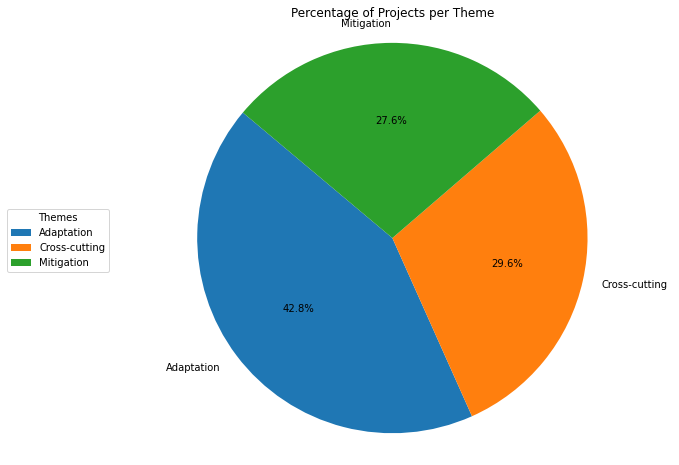

In [11]:
#visualiing the data
plt.figure(figsize=(10, 8))
pie_wedges, texts, autotexts = plt.pie(percentage_per_theme, labels=percentage_per_theme.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Projects per Theme')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Moving the legend to the left side of the plot
plt.legend(pie_wedges, percentage_per_theme.index, title="Themes", loc="center left", bbox_to_anchor=(-0.2, 0.5))

plt.show()

In [12]:
#To calculate the balance by region to answer the question
# Calculate the balance in the finance table
f['Balance'] = f['Budget'] - (f['Adaptation Financing'] + f['Mitigation Financing'])

balance_by_gcf_region = f.groupby('GCF Region')['Balance'].sum()

# Print the result
print(balance_by_gcf_region)

GCF Region
Africa                            -0.08306
Asia-Pacific                      -0.07236
Eastern Europe                    -0.00432
Latin America and the Caribbean   -0.00170
Name: Balance, dtype: float64


In [13]:
# Convert the 'Total GCF Budget' to billion-dollar units
p['Total GCF Budget (Million)'] = p['Total GCF Budget'] / 1e6

# Calculate the average GCF budget per country in billion-dollar units for each project
p['Avg GCF Budget per Country (Million)'] = p['Total GCF Budget (Million)'] / p['Country Count']

# Group by 'Entities' and sum the 'Avg GCF Budget per Country (Billion)'
gcf_budget_by_entity = p.groupby('Entities')['Avg GCF Budget per Country (Million)'].sum().sort_values(ascending=False)

# Get the top 10 entities
top_10_entities = gcf_budget_by_entity.head(10)

# Get the least 10 entities
least_10_entities = gcf_budget_by_entity.tail(10)

# Create a DataFrame for the top 10 entities
top_10_table = pd.DataFrame(top_10_entities).reset_index()
top_10_table.columns = ['Entity', 'Avg GCF Budget per Country (Million USD)']

# Create a DataFrame for the least 10 entities
least_10_table = pd.DataFrame(least_10_entities).reset_index()
least_10_table.columns = ['Entity', 'Avg GCF Budget per Country (Million USD)']

# Print the results in table format
print("Top 10 Entities by Average GCF Budget per Country (Million USD):")
print(top_10_table)
print("\nLeast 10 Entities by Average GCF Budget per Country (Million USD):")
print(least_10_table)

Top 10 Entities by Average GCF Budget per Country (Million USD):
      Entity  Avg GCF Budget per Country (Million USD)
0       UNDP                               1201.979730
1        ADB                                710.052449
2        FAO                                622.472018
3  WorldBank                                612.509814
4       EBRD                                434.520503
5      CABEI                                362.501544
6       DBSA                                348.902500
7       AfDB                                288.020453
8        IDB                                277.422222
9      IDCOL                                256.480000

Least 10 Entities by Average GCF Budget per Country (Million USD):
           Entity  Avg GCF Budget per Country (Million USD)
0        Landbank                                  9.999042
1           NEFCO                                  9.900000
2             OSS                                  9.807800
3            NEMA     

In [14]:
# Group by 'Sector' and sum the 'Total GCF Budget'
gcf_budget_by_sector = p.groupby('Sector')['Total GCF Budget'].sum()

# Convert the total GCF budget to million-dollar units
gcf_budget_by_sector_million = gcf_budget_by_sector / 1e6

# Calculate the total GCF budget across all sectors
total_gcf_budget_million = gcf_budget_by_sector_million.sum()

# Calculate the percentage of the total GCF budget for each sector
gcf_budget_by_sector_percentage = (gcf_budget_by_sector_million / total_gcf_budget_million) * 100

# Create a DataFrame for the total GCF budget by sector with percentages
gcf_budget_by_sector_table = pd.DataFrame({
    'Sector': gcf_budget_by_sector_million.index,
    'Total GCF Budget (Million USD)': gcf_budget_by_sector_million.values,
    'Percentage of Total GCF Budget (%)': gcf_budget_by_sector_percentage.values
})

# Print the results in table format
print("Total GCF Budget by Sector (Million USD and Percentage):")
print(gcf_budget_by_sector_table)

Total GCF Budget by Sector (Million USD and Percentage):
    Sector  Total GCF Budget (Million USD)  Percentage of Total GCF Budget (%)
0  Private                     4850.397212                           35.975366
1   Public                     8632.154224                           64.024634


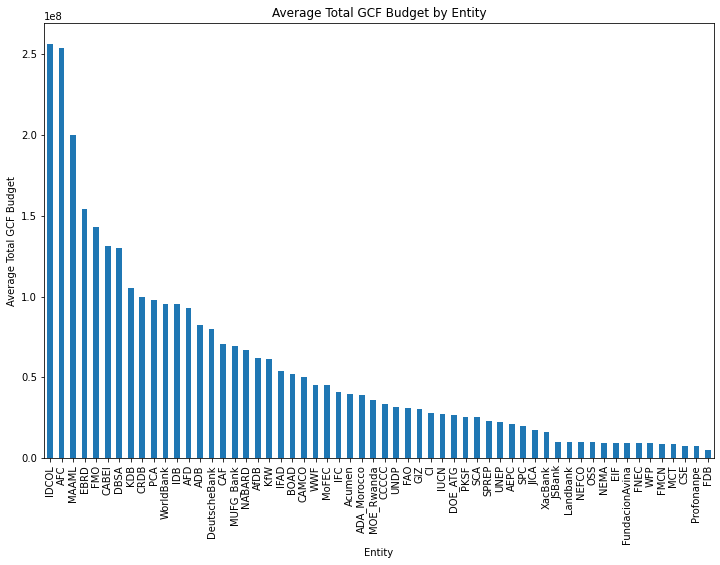

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
entity_success.plot(kind='bar')
plt.title('Average Total GCF Budget by Entity')
plt.ylabel('Average Total GCF Budget')
plt.xlabel('Entity')
plt.show()

entity_success = p.groupby('Entities')['Total GCF Budget'].mean().sort_values(ascending=False)

GCF Budget by Sector Over Years (Million USD and Percentage):
              Million USD              Percentage           
Sector            Private       Public    Private     Public
Approval Year                                               
2015            25.000000   120.825000  17.143837  82.856163
2016           535.500000   590.829075  47.543832  52.456168
2017           293.350050   533.792515  35.465476  64.534524
2018           640.913688  1266.283492  33.605004  66.394996
2019           246.160521   761.077772  24.439154  75.560846
2020           879.564103  1170.461161  42.905037  57.094963
2021           782.900000  2118.992525  26.978945  73.021055
2022           529.610850   906.557099  36.876665  63.123335
2023           917.398000  1163.335585  44.090123  55.909877


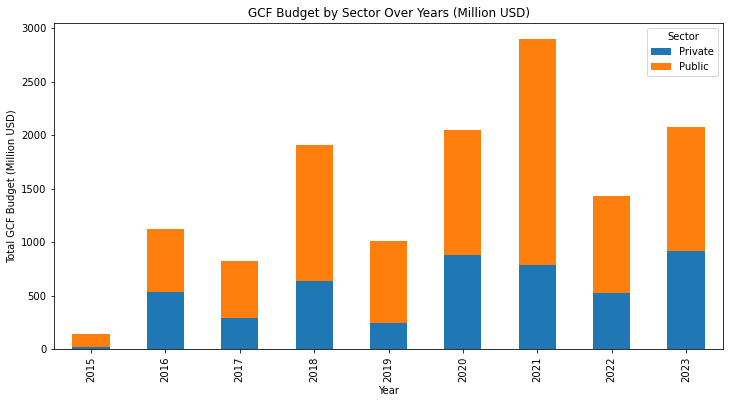

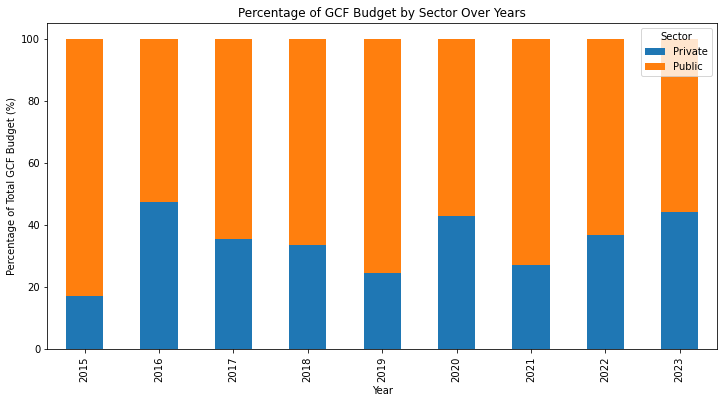

In [16]:
# Convert 'Approval Date' to datetime and extract the year
p['Approval Year'] = pd.to_datetime(p['Approval Date']).dt.year

# Group by 'Approval Year' and 'Sector' and sum the 'Total GCF Budget'
gcf_budget_by_year_sector = p.groupby(['Approval Year', 'Sector'])['Total GCF Budget'].sum().unstack().fillna(0)

# Convert the total GCF budget to million-dollar units
gcf_budget_by_year_sector_million = gcf_budget_by_year_sector / 1e6

# Calculate the total GCF budget for each year
total_gcf_budget_by_year_million = gcf_budget_by_year_sector_million.sum(axis=1)

# Calculate the percentage of the total GCF budget for each sector and year
gcf_budget_by_year_sector_percentage = (gcf_budget_by_year_sector_million.div(total_gcf_budget_by_year_million, axis=0)) * 100

# Combine the absolute and percentage data
gcf_budget_combined = pd.concat([gcf_budget_by_year_sector_million, gcf_budget_by_year_sector_percentage], axis=1, keys=['Million USD', 'Percentage'])

# Print the results in table format
print("GCF Budget by Sector Over Years (Million USD and Percentage):")
print(gcf_budget_combined)

# Plot the trends
plt.figure(figsize=(12, 6))
gcf_budget_by_year_sector_million.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('GCF Budget by Sector Over Years (Million USD)')
plt.ylabel('Total GCF Budget (Million USD)')
plt.xlabel('Year')
plt.legend(title='Sector')
plt.show()

plt.figure(figsize=(12, 6))
gcf_budget_by_year_sector_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Percentage of GCF Budget by Sector Over Years')
plt.ylabel('Percentage of Total GCF Budget (%)')
plt.xlabel('Year')
plt.legend(title='Sector')
plt.show()


In [17]:
p['Co-Finance Ratio'] = p['Total Co Budget'] / p['Total Budget']
# Explode the 'Countries List' into individual rows for each country
p_exploded = p.assign(Country=p['Countries List'].str.split(', ')).explode('Country')

# Calculate the co-finance ratio per country for each project
p_exploded['Co-Finance Ratio per Country'] = p_exploded['Co-Finance Ratio'] / p_exploded['Country Count']

# Group by 'Country' and aggregate the co-finance ratios
co_finance_ratio_per_country = p_exploded.groupby('Country')['Co-Finance Ratio per Country'].mean()

# Print the co-finance ratio per country
print(co_finance_ratio_per_country)

Country
Afghanistan            0.196272
Albania                0.044194
Antigua and Barbuda    0.164351
Argentina              0.154629
Armenia                0.309222
                         ...   
Uzbekistan             0.334927
Vanuatu                0.157957
Viet Nam               0.634912
Zambia                 0.208737
Zimbabwe               0.277559
Name: Co-Finance Ratio per Country, Length: 129, dtype: float64


In [18]:
p_exploded_regions = p.assign(Region=p['Regions List'].str.split(', ')).explode('Region')

# Group by 'Region' and aggregate the co-finance ratios
co_finance_ratio_by_region = p_exploded_regions.groupby('Region')['Co-Finance Ratio'].mean()

# Print the co-finance ratio by region
print(co_finance_ratio_by_region)

Region
Africa                             0.489885
Asia-Pacific                       0.504768
Eastern Europe                     0.716379
Latin America and the Caribbean    0.551081
Name: Co-Finance Ratio, dtype: float64


In [19]:
top_5_countries = co_finance_ratio_per_country.nlargest(5)

# Get the least 5 countries by co-finance ratio
least_5_countries = co_finance_ratio_per_country.nsmallest(5)

# Print the results
print("Top 5 Countries by Co-Finance Ratio:")
print(top_5_countries)
print("\nLeast 5 Countries by Co-Finance Ratio:")
print(least_5_countries)

Top 5 Countries by Co-Finance Ratio:
Country
China                     0.928866
Bosnia and Herzegovina    0.830186
Bhutan                    0.669261
Viet Nam                  0.634912
Thailand                  0.579826
Name: Co-Finance Ratio per Country, dtype: float64

Least 5 Countries by Co-Finance Ratio:
Country
Niue          0.010135
Lebanon       0.013563
Montenegro    0.013563
Myanmar       0.013563
Palau         0.022602
Name: Co-Finance Ratio per Country, dtype: float64


Total Budget by Year with Forecasts (Billion USD):
    Approval Year  Total Budget (Billion USD)
0            2015                    0.657906
1            2016                    3.178766
2            2017                    3.357057
3            2018                    6.367676
4            2019                    4.183720
5            2020                    4.837287
6            2021                   14.411269
7            2022                    5.787732
8            2023                    9.051559
9            2024                   10.924181
10           2025                   11.957174
11           2026                   12.990166
12           2027                   14.023159
13           2028                   15.056151
14           2029                   16.089144
15           2030                   17.122136


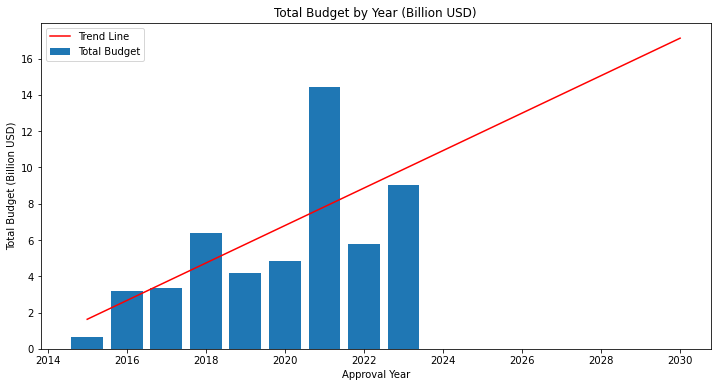

The total budget is not predicted to reach 50 billion by the year 2030.


In [20]:
# Get the sum of finance by year & prediction of fund until 2023
# Group by 'Approval Year' and sum the 'Total Budget'
# Group by 'Approval Year' and sum the 'Total Budget'
total_budget_by_year = p.groupby('Approval Year')['Total Budget'].sum()

# Convert the total budget to billion-dollar units
total_budget_by_year_billion = total_budget_by_year / 1e9

# Create a table for the total budget by year
total_budget_table = pd.DataFrame(total_budget_by_year_billion).reset_index()
total_budget_table.columns = ['Approval Year', 'Total Budget (Billion USD)']

# Prepare data for prediction
X = total_budget_table['Approval Year'].values.reshape(-1, 1)
y = total_budget_table['Total Budget (Billion USD)'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict total budget up to 2030
years_to_predict = np.arange(total_budget_table['Approval Year'].min(), 2031).reshape(-1, 1)
predicted_budget = model.predict(years_to_predict)

# Extend the table to include forecasted values
forecast_table = pd.DataFrame({
    'Approval Year': years_to_predict.flatten(),
    'Total Budget (Billion USD)': predicted_budget
})

# Combine the actual and forecasted data
combined_table = pd.concat([total_budget_table, forecast_table[forecast_table['Approval Year'] > total_budget_table['Approval Year'].max()]])

# Print the extended table with forecasts
print("Total Budget by Year with Forecasts (Billion USD):")
print(combined_table)

# Plot the total budget by year with a trend line
plt.figure(figsize=(12, 6))
plt.bar(total_budget_table['Approval Year'], total_budget_table['Total Budget (Billion USD)'], label='Total Budget')
plt.plot(years_to_predict, predicted_budget, color='red', linestyle='-', label='Trend Line')
plt.title('Total Budget by Year (Billion USD)')
plt.ylabel('Total Budget (Billion USD)')
plt.xlabel('Approval Year')
plt.legend()
plt.show()

# Check if the predicted budget can reach 50 billion by 2030
predicted_budget_reached = predicted_budget[-1] >= 50
if predicted_budget_reached:
    print("The total budget is predicted to reach or exceed 50 billion by the year 2030.")
else:
    print("The total budget is not predicted to reach 50 billion by the year 2030.")

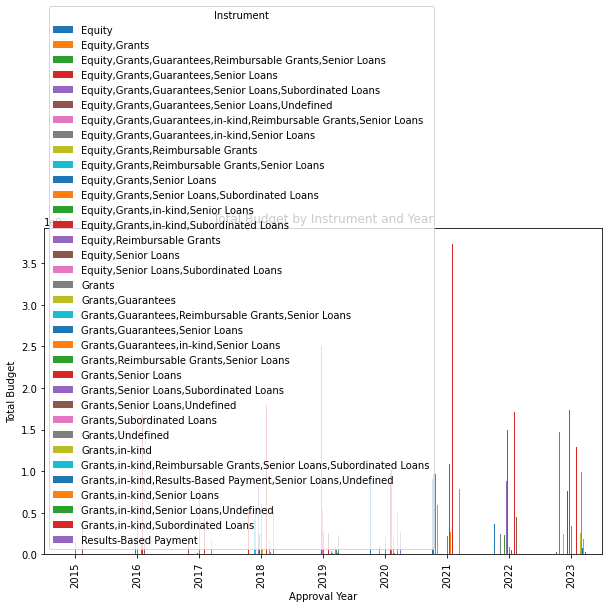

In [21]:
p_split = p.drop('Instruments List', axis=1).join(
    p['Instruments List'].str.split(', ').apply(pd.Series).stack().reset_index(level=1, drop=True).rename('Instrument')
)

# Convert 'Approval Date' to datetime and extract the year
p_split['Approval Year'] = pd.to_datetime(p_split['Approval Date']).dt.year

# Group by 'Instrument' and 'Approval Year', and sum the 'Total Budget'
budget_by_instrument_year = p_split.groupby(['Instrument', 'Approval Year'])['Total Budget'].sum().reset_index()

# Pivot the table for plotting
pivot_table = budget_by_instrument_year.pivot(index='Approval Year', columns='Instrument', values='Total Budget')

# Plot the trends
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Total Budget by Instrument and Year')
plt.ylabel('Total Budget')
plt.xlabel('Approval Year')
plt.legend(title='Instrument')
plt.show()